In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.spatial
from scipy.spatial import distance
import random
import numpy as np
import pandas as pd 
import scipy.spatial
from haversine import haversine

In [10]:
data=pd.read_csv('CityData_new.csv')

In [11]:
lats=data['Latitude'].to_list()
lons=data['Longitude'].to_list()
#weights=data["Weight"].to_list()
Weights=data["Weight"].to_numpy()

In [12]:

def distance(p1,p2):
  return haversine(p1[1:],p2[1:])

def cluster_centroids(data, clusters, k):
  results=[]
  for i in range(k):
    results.append(np.average(data[clusters == i],weights = Weights[clusters==i],axis=0))
  return results

def kmeans(data, k=None, centroids=None, steps=30):
  # Forgy initialization method: choose k data points randomly.
  centroids = data[np.random.choice(np.arange(len(data)), k, False)]
  elbow = []
  for _ in range(max(steps, 1)):
    sqdists = scipy.spatial.distance.cdist(centroids, data, lambda u, v: haversine(u,v))
    elbow.append(sqdists)
    # Index of the closest centroid to each data point.
    clusters = np.argmin(sqdists, axis=0)
    new_centroids = cluster_centroids(data, clusters, k)

    if np.array_equal(new_centroids, centroids): 
      break
    centroids = new_centroids 
    
  return clusters, centroids,elbow

In [13]:
np_CityData = data[["Latitude","Longitude"]].to_numpy()
vals = data[['Latitude','Longitude']].values
sse=[]
for k in range(1,20):
    clusters,centroids,elbow=kmeans(vals,k)  
    for i in range(k):
        sqdist = np.sum(scipy.spatial.distance.cdist(np_CityData[clusters==i],centroids,'sqeuclidean'))
    sse.append(sqdist)
sse=sorted(sse,reverse=True)

In [18]:
#Automating decision making of no. of cluster 
norm = np.linalg.norm

p_first = np.array([1,sse[0]])
p_last = np.array([len(sse),sse[len(sse)-1]])
perpedicular_distance = []    
for i in range(0,len(sse)):
    p = np.array([i+1,sse[i]])
    a = p_last-p_first
    b = p-p_first
    d = norm(np.cross(a,b))/norm(a)
    perpedicular_distance.append(d)

max_index = 1+perpedicular_distance.index(max(perpedicular_distance)) #+1 because index starts from 0
#max_index is out optimal cluster method according to this method

([0.0,
  2.0743071597657368,
  1.5544412151410805,
  1.8811055900892686,
  6.049289877816152,
  5.44104433630423,
  6.151604036449679,
  5.334477490006249,
  5.921652146511178,
  5.0382033976020955,
  4.479933230414338,
  3.831539822023675,
  3.3551398173275944,
  3.3067699479932178,
  2.7090159214153386,
  1.9798469101318876,
  1.288530660354743,
  0.40517458868487066,
  0.0],
 7)

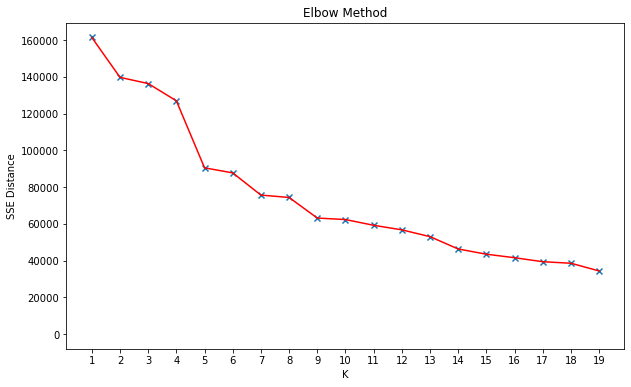

<Figure size 432x288 with 0 Axes>

In [19]:
'''fig = plt.figure(figsize=(10,6))
x=list(range(1,20))
labels=x
plt.plot(x,sse,'r')
plt.scatter(x,sse,marker='x')
plt.xticks(x, labels)
plt.title('Elbow Method')
plt.xlabel('K')
plt.ylabel('SSE Distance')
plt.plot([8, 8], [0,1.0417261149971132e+2 ],color='green',
         linestyle='dashed',linewidth=1)  # plotting the arbitrary line from point (25,10) to (65,45).    
plt.show()
plt.savefig('elbow.png')'''

In [ ]:
'''min_customer=6   #this value from Anylogic
k=1
random.seed(42)
#run it
while min_customer<min(points_in_cluster)
    k+=1
    clusters,centroids,elbow=kmeans(vals,k)
    #from all cluster 
    points_in_cluster = []
    clusters_list = clusters.tolist()
    for i in range(len(centroids)):
        occurrence = 0
        occurrence = clusters_list.count(i)

        points_in_cluster.append(occurrence)
    min(points_in_cluster)
    '''
#this k will be our final result
# then we dont need to calc extra time cluster/centroids

In [29]:
#chose optimal no of cluster you want to have
#k = max_index
k=8
random.seed(42)
#run it
clusters,centroids,elbow=kmeans(vals,k)
#centroids

In [31]:
#after getting final centroids, get minimum no. of data points
#from all cluster 
points_in_cluster = []
clusters_list = clusters.tolist()
for i in range(len(centroids)):
    occurrence = 0
    occurrence = clusters_list.count(i)
    
    points_in_cluster.append(occurrence)
    
points_in_cluster


14

In [22]:
#using cDist see the distance between adjusted and old centroids
from scipy.spatial import distance
adjusted_centroids_cdist = [] 
distance_between_cdist_centroids = []
adjusted_centroids_haversine = [] 
distance_between_haversine_centroids = []

for i in range(len(centroids)):
    old_centroid = centroids[i]
    a = old_centroid
    #to use in haversine function we need to duplicate and add the same array with each other
    duplicated_double_array = np.stack((old_centroid, old_centroid))
    #city within that cluster
    cities_assigned_to_centroid = np_CityData[clusters==i]
    #closest city from our centroid usinf haversine
    closest_index_haversine = scipy.spatial.distance.cdist(duplicated_double_array, cities_assigned_to_centroid, lambda u, v: haversine(u,v)).argmin()
    #assingning that closest city as our new centroids
    new_centroid_haversine = cities_assigned_to_centroid[closest_index_haversine]
    #distance between those two
    distance_between_haversine_centroids.append(haversine(a,new_centroid_haversine))
    #adding that centroids to centroid array
    x = cities_assigned_to_centroid[closest_index_haversine]
    adjusted_centroids_haversine.append(x)
    
adjusted_centroids_haversine
#distance_between_haversine_centroids



[array([42.286389, 18.84    ]),
 array([46.195602,  6.148113]),
 array([46.463934, 30.738551]),
 array([51.514942,  7.465997]),
 array([53.7559, 23.832 ]),
 array([40.412752, -3.707721]),
 array([47.233333, 16.616667])]